In [54]:
import pandas as pd 
import numpy as np 
df = pd.read_csv("Fraud.csv")

In [55]:
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [56]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [57]:
df.shape


(6362620, 11)

In [58]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [59]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [60]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

# **Attributes and their Meaning**

**1. step**  
- Maps a unit of time in the real world.  
- **1 step = 1 hour**.  
- Total steps = **744 (30 days simulation)**.  

---

**2. type**  
- Transaction type. Possible values:  
  - **CASH-IN**  
  - **CASH-OUT**  
  - **DEBIT**  
  - **PAYMENT**  
  - **TRANSFER**  

---

**3. amount**  
- Amount of the transaction in **local currency**.  

---

**4. nameOrig**  
- **Customer ID** who started (initiated) the transaction.  

---

**5. oldbalanceOrg**  
- **Initial balance** of the origin account before the transaction.  

---

**6. newbalanceOrig**  
- **New balance** of the origin account after the transaction.  

---

**7. nameDest**  
- **Customer ID** of the recipient of the transaction.  

---

**8. oldbalanceDest**  
- **Initial balance** of the destination account before the transaction.  
- Note: No information available for customers whose ID starts with **M** (Merchants).  

---

**9. newbalanceDest**  
- **New balance** of the destination account after the transaction.  
- Note: No information available for customers whose ID starts with **M** (Merchants).  

---

**10. isFraud**  
- **1 = Fraudulent transaction**, **0 = Genuine transaction**.  
- Fraudulent agents try to take control of customer accounts and **transfer funds**, then **cash out**.  

---

**11. isFlaggedFraud**  
- Transaction flagged as **illegal** by the business model.  
- Happens when there is a **transfer greater than 200,000** in a single transaction.  

---


In [61]:
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [62]:
df["isFlaggedFraud"].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

# **Data Cleaning**

In [63]:
# Handling Missing Value 
# Inspecting For Any Null Values 
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

# **Exploratory Data Analysis**

In [64]:
df.shape # ( Rows, Columns )


(6362620, 11)

In [65]:
df["isFraud"].value_counts() # here 0th Index show Non-Fraud Affected Rows & 1th Index Show rows affected by fraud

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [66]:
# Finding Fraud Percentage i.e Total Rows [0th Index ] / total Frauds [1th Index] * 100

round( (df["isFraud"].value_counts()[1] / df.shape[0] ) * 100 , 2)

0.13

 **Fraud % = 0.13%**

**VISUAIZATION AND OUTLIERS DETECTING** 

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

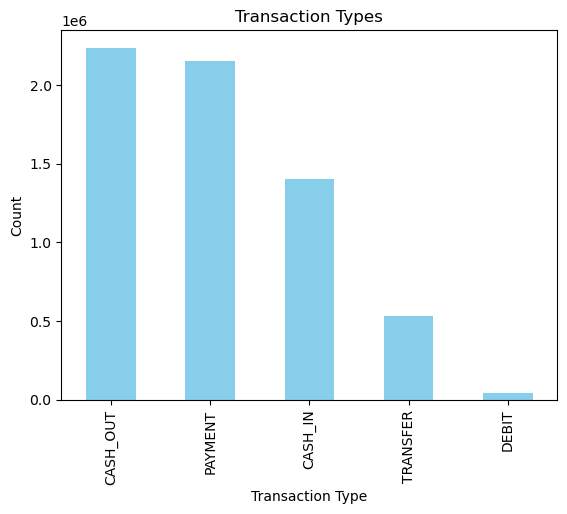

In [68]:
#bar Graph Transaction type VS Count 
df["type"].value_counts().plot(kind="bar", title="Transaction Types", color = "skyblue")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.show()

**Key Inshights : There are CASH_OUT & PAYMENT Transaction types are more frequent , which these types of transactions are more likely to involve fraudlent activities**

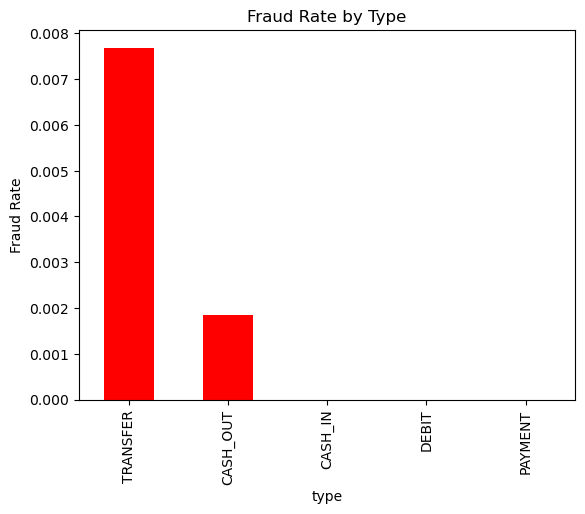

In [69]:
# Finding Fraud Rate Using types of transactions by Mean " isFraud" value of each grouped transaction type and isfraud  
fraud_by_type = df.groupby("type") ["isFraud"].mean().sort_values(ascending = False) 
fraud_by_type.plot(kind="bar" , title="Fraud Rate by Type", color="Red")
plt.ylabel("Fraud Rate")
plt.show()

In [70]:
# here a fraud rate of 0.3% (0.003) means that about 3 in 1,000 transactions of that type are fraudulent.

In [71]:
print(fraud_by_type)

type
TRANSFER    0.007688
CASH_OUT    0.001840
CASH_IN     0.000000
DEBIT       0.000000
PAYMENT     0.000000
Name: isFraud, dtype: float64


In [72]:
overall_fraud_rate = df['isFraud'].mean()
print(f"Overall fraud rate: {overall_fraud_rate:.5f}")

Overall fraud rate: 0.00129


 **KEY INSIGHTS**
1. TRANSFER has the highest fraud rate among the shown types Approx ~0.77% - 0.80%
2. CASH_OUT also has a notable fraud rate Approx ~0.19% - 0.20%

In [73]:
df["amount"].describe().astype(int)

count     6362620
mean       179861
std        603858
min             0
25%         13389
50%         74871
75%        208721
max      92445516
Name: amount, dtype: int32

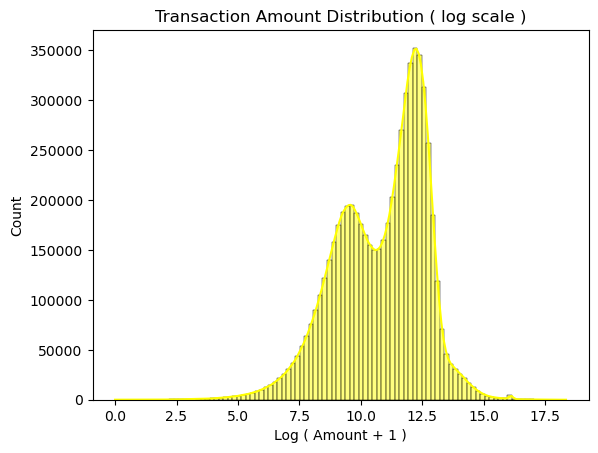

In [74]:
sns.histplot(np.log1p(df["amount"]),bins=100,kde=True, color = "yellow")
plt.title("Transaction Amount Distribution ( log scale )")
plt.xlabel("Log ( Amount + 1 )")
plt.show()

**INSIGHTS**
1. Showed most transactions are small amounts (close to 0–10,000).
2. A few transactions go extremely high (outliers up to ~92 million)
3. Non-fraud transactions cluster around lies smaller amounts (~10k).
4. Fraud transactions appear more often in large transaction amounts (>50k).

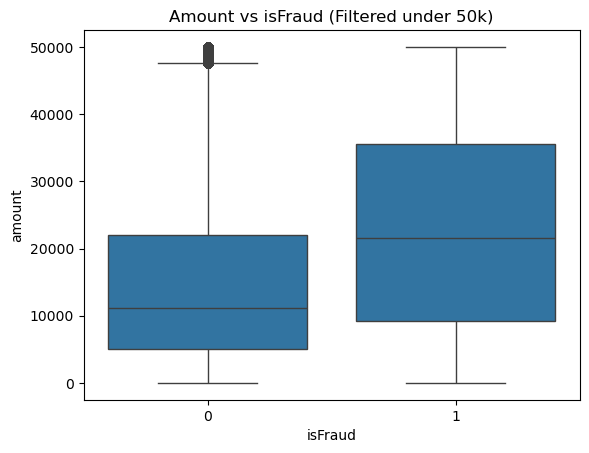

In [75]:
sns.boxplot(data = df[df["amount"] < 50000], x = "isFraud", y="amount")
plt.title("Amount vs isFraud (Filtered under 50k)")
plt.show()

**INSIGHTS**
1. Higher Amounts which are filtered under 50k have more Fraud Rates
2. And Lower Amounts mostly from 10k-20k ranges are more likely to come under non-fraud rates.

In [76]:
# Balance Chaines and anamolies
df["balanceDiffOrig"] = df["oldbalanceOrg"] - df["newbalanceOrig"]
df["balanceDiffDest"] = df["newbalanceDest"] - df["oldbalanceDest"]


In [77]:
# checking if we have have balance difference with some negative values on original side 
(df["balanceDiffOrig"]<0).sum()

1399253

In [78]:
# checking if we have have balance difference with some negative values on Destination Side 
(df["balanceDiffDest"]<0).sum()

1238864

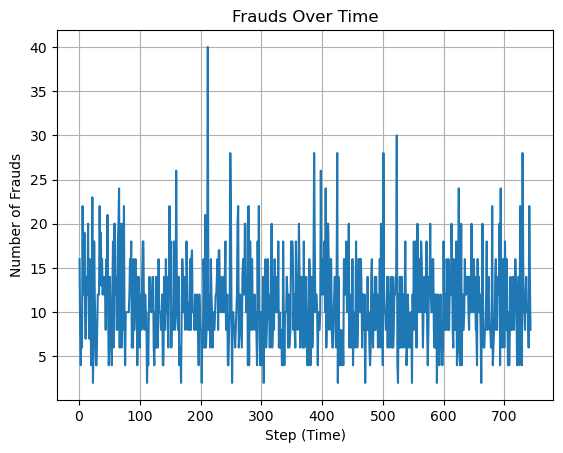

In [79]:
frauds_per_step = df[df["isFraud"] == 1] ["step"].value_counts().sort_index()
plt.plot(frauds_per_step.index, frauds_per_step.values, label = "Frauds per Step")
plt.xlabel("Step (Time)")
plt.ylabel("Number of Frauds")
plt.title("Frauds Over Time")
plt.grid(True)
plt.show()


1. Fraud activity varies across time steps, with counts typically between 5 and 20, but occasional spikes (peaks) where frauds reach higher values
2. The graphs depicts that , the frauds are not likely depends on time.

In [80]:
# Step column should not be used for modeling and should be droped
df.drop(columns="step", inplace=True)
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [81]:
# Top SEnders and Receivers of Transanctions 
top_senders = df["nameOrig"].value_counts().head(10)
top_senders

nameOrig
C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
C1677795071    3
C1462946854    3
C1999539787    3
C2098525306    3
C400299098     3
Name: count, dtype: int64

In [82]:
top_receivers = df["nameDest"].value_counts().head(10)
top_receivers


nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C451111351      99
C1789550256     99
C1360767589     98
C1023714065     97
Name: count, dtype: int64

In [83]:
#Finding fraud users
fraud_users = df[df["isFraud"]==1]["nameOrig"].value_counts().head(10)

In [84]:
fraud_users

nameOrig
C1305486145    1
C755286039     1
C973279667     1
C258213312     1
C1640703547    1
C1127265876    1
C317779855     1
C1064034527    1
C1141104763    1
C1966863341    1
Name: count, dtype: int64

In [85]:
#Frauds Types in Transfer and cash out transaction type
fraud_types=df [df["type"].isin(["TRANSFER","CASH_OUT"])]

In [86]:
fraud_types.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
2,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,181.0,0.00
3,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,181.0,-21182.00
15,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,15325.0,46430.44
19,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,705.0,-22425.00
24,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,10835.0,2712905.89


In [87]:
#total frauds in cashout and transfer types
fraud_types["type"].value_counts()

type
CASH_OUT    2237500
TRANSFER     532909
Name: count, dtype: int64

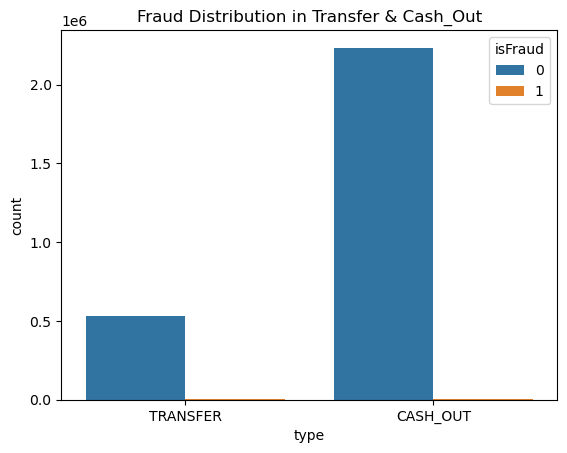

In [88]:
#Graph for total numbers for isfraud & non fraud in transfer and cashout transaction type.
sns.countplot(data=fraud_types,x="type", hue="isFraud")
plt.title("Fraud Distribution in Transfer & Cash_Out")
plt.show()

1. Because of low fraud values we can able to see orange bar properly but it has some traces in the graph.
   

**FINDING CORRELATION MATRICES**

In [89]:
corr = df[["amount","oldbalanceOrg","newbalanceOrig", "oldbalanceDest","newbalanceDest" , "isFraud"]].corr()

In [90]:
corr


,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
amount,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688
oldbalanceOrg,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154
newbalanceOrig,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148
oldbalanceDest,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885
newbalanceDest,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535
isFraud,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000


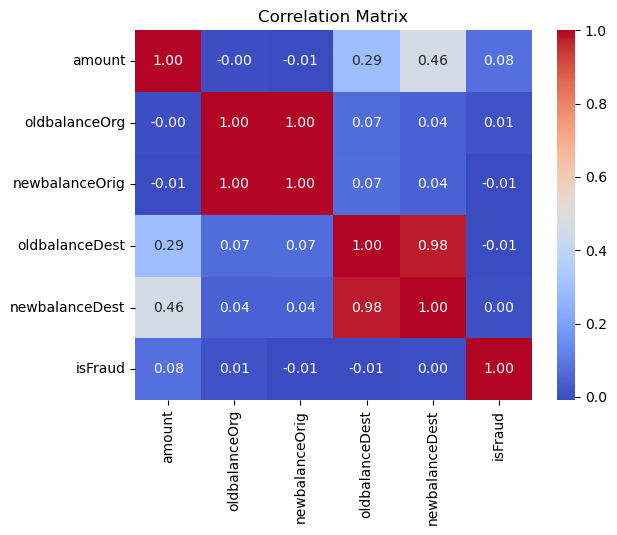

In [91]:
#visualizing Corr matrix using heatmap
sns.heatmap(corr,annot=True , cmap = "coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

**KEY INSIGHTS**
1. There is a high positive correlation of 0.98 between 'new balance destination' and 'old balance destination'. This is considered
   normal.
2. A correlation of 0.46 was observed between 'new balance destination' and 'amount'. This correlation is described as "not that
   strong but not that weak".
3. As a recap, correlation values range between -1 and 1.
    1. -1 indicates a strong negative relationship.
    2. 1 indicates a strong positive relationship.
    3. 0 means there is no significant relationship

In [92]:
# Filtering Customers who priorly have balance and after the transfer they left with zero balance 
zero_after_transfer = df[
    (df["oldbalanceOrg"] > 0) &
    (df["newbalanceOrig"]==0 ) &
    (df["type"].isin(["TRANSFER","CASH_OUT"]))
]

In [93]:
len(zero_after_transfer)

1188074

In [94]:
#List OF Fraud Victims 
zero_after_transfer.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
2,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,181.0,0.00
3,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,181.0,-21182.00
15,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,15325.0,46430.44
19,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,705.0,-22425.00
24,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,10835.0,2712905.89


In [95]:
df[ "isFraud" ].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

**KEY RESULTS BY DOING EXPLORATORY DATA ANALYSIS**

1. The dataset has **over 6 million rows and 11 columns**, with **no missing values**.
2. There is a **class imbalance**: only **0.13% (\~8,200 transactions)** are frauds, while **6.35M+ are non-fraud**.
3. Fraud occurs mainly in **‘Transfer’** and **‘Cash out’** transactions, while **‘Cash in’**, **‘Debit’**, and **‘Payment’** have almost zero fraud.
4. **‘Cash out’** is the most common transaction type overall.
5. Transaction amounts vary widely, up to **92 million**, showing clear **outliers**.
6. Higher transaction amounts (especially under **50k filter**) are linked with **higher fraud rates**.
7. Many transactions show **negative balance differences**, which is suspicious.
8. Over **1 million unusual cases** exist where the **old balance > 0 but new balance = 0**, mostly in **‘Transfer’** and **‘Cash out’**.
9. Fraud is **not time-dependent**, so the **step column was dropped**.
10. A **very strong correlation (0.98)** exists between **new balance destination** and **old balance destination**.







# **FEATURE ENGINEERING**

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [97]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [98]:
#Before defining features there is need to drop some invaluable columns
df_model = df.drop(["nameOrig","nameDest","isFlaggedFraud"],axis = 1 )


In [99]:
df_model.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,9839.64,0.0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,1864.28,0.0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,181.00,0.0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,181.00,-21182.0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,11668.14,0.0


In [100]:
#define which columns were categorical and which were numerical for the ColumnTransformer
categorical = ["type"]
numeric = [ "amount", "oldbalanceOrg","newbalanceOrig", "oldbalanceDest","newbalanceDest"]

In [101]:
y = df_model["isFraud"]  
X = df_model.drop(columns=['isFraud'], axis=1)


• Y: Set to the isFraud column.
• X: Created by dropping the isFraud column from df_model

In [102]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [103]:
#A ColumnTransformer was set up to apply StandardScaler to numerical features and OneHotEncoder to categorical features.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric),
        ('cat', OneHotEncoder(drop='first'), categorical)
    ],
    remainder='drop' # Explicitly drop any columns not specified
)


1. StandardScaler(): Applied to numerical_features to scale them .
2. OneHotEncoder(drop='first'): Applied to categorical_features to convert them into a numerical format, with drop='first' to avoid
  multicollinearity .
3. remainder='drop': Ensures that any columns not specified in numerical_features or categorical_features are dropped

# **Predictive Model Training**

**LOGISTIC REGRESSION**

In [104]:
#Creating the Model Pipeline 
pipeline = Pipeline([
    ('prep', preprocessor),
    ('clf', LogisticRegression(class_weight='balanced', max_iter=1000))
])

In [105]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['type'])])),
                ('clf',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [106]:
# Prediction making on Test Data using the trained pipeline
y_pred = pipeline.predict(X_test)

In [107]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1906322
           1       0.02      0.95      0.04      2464

    accuracy                           0.95   1908786
   macro avg       0.51      0.95      0.51   1908786
weighted avg       1.00      0.95      0.97   1908786



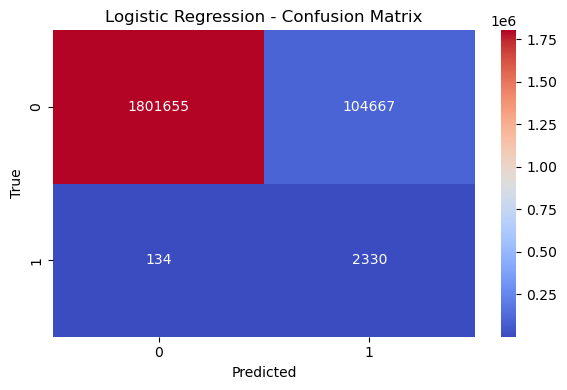

In [108]:
confusion_matrix(y_test,y_pred)
cm_lr = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='coolwarm')
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

In [109]:
pipeline.score(X_test, y_test ) * 100

94.50954690572961

# **The overall accuracy of the model on the test set is calculated as 94%**

 # **QUESTIONS AND ANSWERS**